<a href="https://colab.research.google.com/github/shirazgha/TP_RN/blob/main/TPRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')

2-Afficher les 10 premières lignes du DataFrame.

In [4]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


3-Afficher les dimensions du dataframe.

In [5]:
print(data.shape)

(150, 6)


4-Utiliser la bibliothèque python Seaborn pour visualiser les données en
fonction de la longueur des pétales et de largeur des sépales.


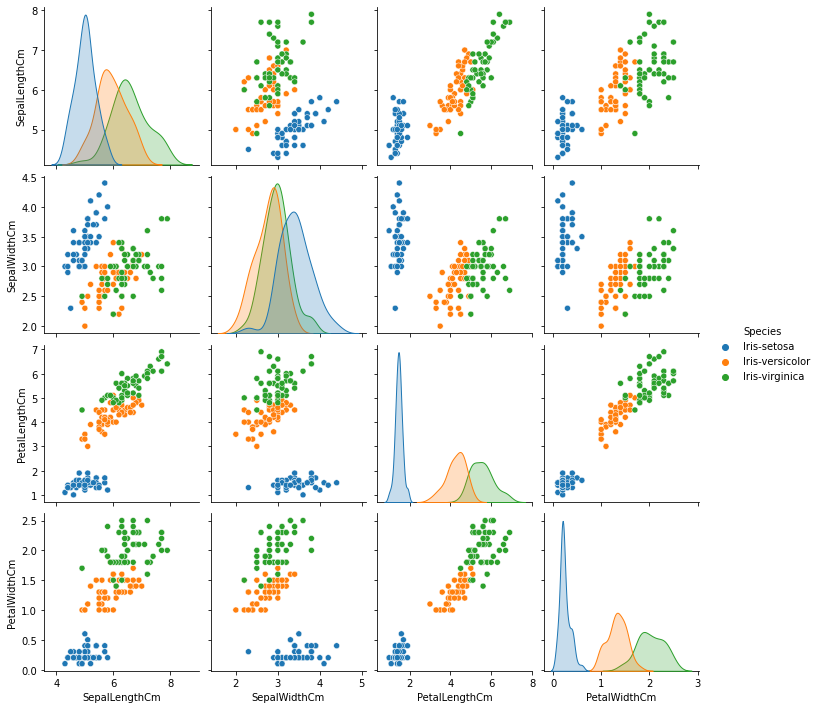

In [6]:
sns.pairplot(data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species');

5-Ecrire un script python permettant de labelliser les différentes espèces
d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )


In [7]:
cible = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
cible.sample(10)

,Species
88,1
97,1
123,2
32,0
21,0
65,1
55,1
27,0
115,2
91,1


6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame
contenant les labels.

In [8]:
df_norm = data[['Id','SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
df = pd.concat([df_norm, cible], axis=1)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


7-Écrire un script python permettant la division de dataset en des données
d’apprentissage (70%) et des données de test (30%)

In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
train,test = train_test_split(df , test_size=0.3)
x_train = train[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
y_train = train.Species
x_test = test[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']] 
y_test = test.Species

8-Afficher les 10 premières données d’apprentissage et celles de test.

In [10]:
x_train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
30,4.8,3.1,1.6,0.2
42,4.4,3.2,1.3,0.2
17,5.1,3.5,1.4,0.3
102,7.1,3.0,5.9,2.1
47,4.6,3.2,1.4,0.2
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
29,4.7,3.2,1.6,0.2
83,6.0,2.7,5.1,1.6


In [11]:
y_train.head(10)

101    2
30     0
42     0
17     0
102    2
47     0
0      0
46     0
29     0
83     1
Name: Species, dtype: int64

In [12]:
x_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
15,5.7,4.4,1.5,0.4
79,5.7,2.6,3.5,1.0
55,5.7,2.8,4.5,1.3
60,5.0,2.0,3.5,1.0
23,5.1,3.3,1.7,0.5
39,5.1,3.4,1.5,0.2
24,4.8,3.4,1.9,0.2
28,5.2,3.4,1.4,0.2
119,6.0,2.2,5.0,1.5


In [13]:
y_test.head(10)

41     0
15     0
79     1
55     1
60     1
23     0
39     0
24     0
28     0
119    2
Name: Species, dtype: int64

9-Ecrire un script python qui utilise un perceptron multicouche pour
l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et
nombre maximum d’itération=150) .


In [14]:
from sklearn.neural_network import MLPClassifier #Classificateur Perceptron multicouche

clf =  MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07 , max_iter = 150) #epsilon : Valeur de stabilité numérique
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')

10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.


In [15]:
from sklearn import metrics

prediction = clf.predict(x_test)
print(prediction)

[0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2]


In [16]:
print(y_test.values)

[0 0 1 1 1 0 0 0 0 2 1 1 0 0 0 2 2 0 2 1 1 2 1 2 1 1 2 0 2 1 1 1 1 2 2 2 2
 0 1 1 1 1 2 1 2]


In [17]:
print('The accuracy of the multi-layer perception is:', metrics.accuracy_score(prediction, y_test)) #précision
%time #temps de reponse

The accuracy of the multi-layer perception is: 0.5777777777777777
CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 12.4 µs


11-Afficher la matrice de confusion associée à notre cas.


In [18]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 41.3 MB/s 
     |████████████████████████████████| 156 kB 76.8 MB/s 
     |████████████████████████████████| 199 kB 97.0 MB/s 
     |████████████████████████████████| 73 kB 2.0 MB/s 
     |████████████████████████████████| 103 kB 82.0 MB/s 
     |████████████████████████████████| 41 kB 704 kB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 295 kB 64.3 MB/s 
     |████████████████████████████████| 965 kB 72.3 MB/s 
     |████████████████████████████████| 98 kB 5.2 MB/s 
     |████████████████████████████████| 8.8 MB 24.8 MB/s 
     |████████████████████████████████| 468 kB 68.0 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6b1e0b7e44ca861ab3ba0856dfc6a558a60c398f6db27a41d59cb04f34ff9bee
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1c

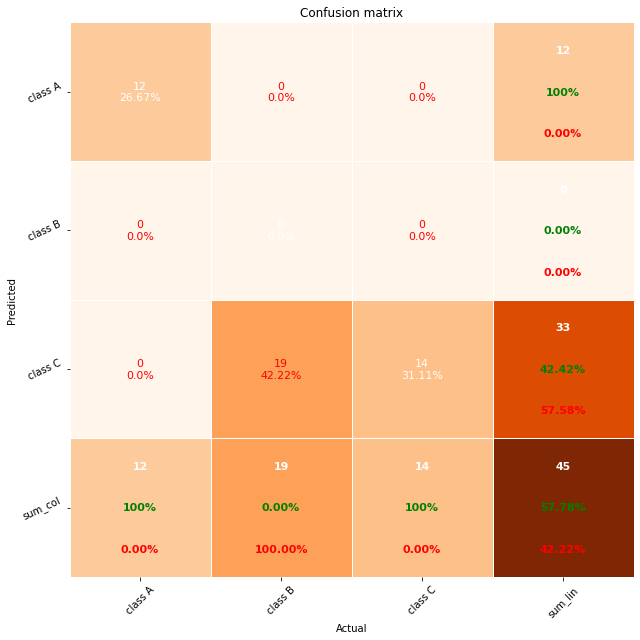

In [19]:
from pretty_confusion_matrix import pp_matrix_from_data
cmap='PuRd'
pp_matrix_from_data(y_test.values, prediction)

12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.

-La classe A donne 100 % valeurs de prédites correctes

-La classe B donne 100 % valeurs de prédites incorrectes

-La classe C est de 100 % correcte 
La somme des pourcentages des classes A et B et C donne 57.78% 

13-On va ajouter le paramètre de taux d’apprentissage au niveau de
classifieur utilisé pour une valeur égale 0.7

In [22]:
%time

classification = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3),learning_rate="constant", learning_rate_init=0.7, max_iter=150)
classification.fit(x_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

14-Nous allons étudier la variation du paramètre de taux d’apprentissage,
donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test
en fonction de variation du taux d’apprentissage.


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

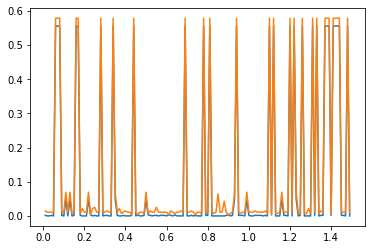

In [23]:
TestValue=[]
variation=[]
TrainValue=[]
for i in range(1,150):

  appvalue=i/100
  variation.append(appvalue)

  model=MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=appvalue)
  model=model.fit(x_train, y_train)

  appModel=model.predict(x_train)
  TrainValue.append(metrics.mean_squared_log_error(y_train,appModel))

  appTest=model.predict(x_test)
  TestValue.append(metrics.mean_squared_log_error(y_test,appTest))
  
  
plt.plot(variation,TrainValue,label="Evolution d’apprentissage")
plt.plot(variation,TestValue,label="Evolution de test")
plt.show()

15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au
début. Quel est le phénomène constaté ? et comment pouvons- nous
surmonter celui-ci ?

In [24]:
import matplotlib.pyplot as plt
classification = MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,max_iter=1500, solver='lbfgs')
classification.fit(x_train , y_train)
apprentissage=classification.predict(x_train)
metrics.accuracy_score(apprentissage,y_train)

0.7142857142857143

16-Tester d’autres classifieurs de type réseau de neurones
(Dynamique/Récurrent et Non récurrent) .

In [26]:
from tensorflow import keras
from keras.layers import Dense,SimpleRNN
seq = keras.Sequential()
seq.add(Dense(len(x_train.columns),input_shape=(len(x_train.columns),),activation='relu'))
seq.add(Dense(1,activation='softmax'))
seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
seq = seq.fit(x_train, y_train)
seq
sequence = keras.Sequential()
sequence.add(SimpleRNN(len(x_train.columns),return_sequences=True, return_state=True))
sequence.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
sequence

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.2952


17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ? justifier vos réponses.